# Información útil de los informes ReeR

In [2]:
"""1º Importo las librerías que creo que puedo necesitar en esta tarea."""

# Manejo de datos
import pandas as pd  # Análisis y manipulación de datos en tablas
import numpy as np  # Cálculos numéricos y matrices
import os

# Visualización de datos
import matplotlib.pyplot as plt  # Gráficos básicos en 2D
import seaborn as sns  # Gráficos estadísticos mejorados
import plotly.express as px  # Gráficos interactivos simplificados
import plotly.graph_objects as go  # Control avanzado de gráficos en Plotly
import plotly.io as pio  # Interfaz de entrada/salida de Plotly
import squarify  # Visualización de diagramas de "treemap"

# Web Scraping y APIs
import requests  # Peticiones HTTP para obtener datos de APIs como PubChem

# Quimioinformática y Bioinformática
from rdkit import Chem  # Manejo de estructuras químicas
from rdkit.Chem import DataStructs, AllChem  # Análisis molecular
import pubchempy as pcp  # Interacción con la base de datos de PubChem

### **Informe 2021**

##### Tabla 1. Número de casos notificados al Registro Estatal de Enfermedades Raras según C.A. declarante y año de captación.
página 9, tabla 1

In [3]:
casos_notificados_10_18 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2021\tabla_p9_t1.csv')
casos_notificados_10_18.fillna(value= 0, inplace=True)
casos_notificados_10_18 = casos_notificados_10_18.loc[1:11].reset_index(drop=True)

In [4]:
"""El sistema detecta el punto de los miles como una coma - CORREGIR"""
columnas_numericas = casos_notificados_10_18.columns[1:]

for col in columnas_numericas:
    casos_notificados_10_18[col] = casos_notificados_10_18[col].astype(str).str.replace('.', '')    # elimino puntos
    casos_notificados_10_18[col] = casos_notificados_10_18[col].astype(float).astype(int)           # convierto a enteros

casos_notificados_10_18.drop(columns=['Total'], inplace=True)
casos_notificados_10_18.rename(columns={"Registros": "comunidad", "Antes de\n2010": "< 2010"}, inplace=True)
casos_notificados_10_18

,comunidad,< 2010,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aragón,0,0,0,0,0,0,0,0,310,4280
1,Canarias,70,1300,850,820,1000,930,870,820,540,940
2,Castilla y León,4700,3330,2270,2640,2050,2210,2170,2060,2180,1680
3,Cataluña,1075,3910,2710,2440,2230,2260,1890,2130,2770,2800
4,Comunidad\nValenciana,7200,3110,3640,3200,4070,4230,3000,4180,3300,2960
5,Galicia,2220,450,270,280,430,270,110,120,130,8710
6,"Madrid, Comunidad\nde",309,5030,5070,4490,4670,4580,4630,5470,5480,6510
7,"Murcia, Región de",6310,1080,1300,990,1340,790,810,700,730,780
8,"Navarra, Comunidad\nForal de",5310,340,370,410,560,440,750,420,410,320
9,País Vasco,0,0,0,0,0,0,320,810,3220,2480


###### Total de casis notificados por comunidad:

In [5]:
casos_notificados_10_18['comunidad']

0                           Aragón
1                         Canarias
2                  Castilla y León
3                         Cataluña
4            Comunidad\nValenciana
5                          Galicia
6            Madrid, Comunidad\nde
7                Murcia, Región de
8     Navarra, Comunidad\nForal de
9                       País Vasco
10                       Rioja, La
Name: comunidad, dtype: object

In [6]:
"""Adaptación de los nombres de las comunidades"""
nombre_com = {
    "Andalucía": "Andalucía",
    "Aragón": "Aragón",
    "Canarias": "Canarias",
    "Castilla y León": "Castilla y León",
    "Cataluña": "Cataluña",
    "Comunidad\nValenciana": "Comunidad Valenciana",
    "Galicia": "Galicia",
    "Madrid, Comunidad\nde": "Madrid",
    "Murcia, Región de": "Murcia",
    "Navarra, Comunidad\nForal de": "Navarra",
    "País Vasco": "País Vasco",
    "Rioja, La": "La Rioja"
}
casos_notificados_10_18["comunidad"] = casos_notificados_10_18["comunidad"].map(nombre_com)
casos_notificados_10_18

,comunidad,< 2010,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aragón,0,0,0,0,0,0,0,0,310,4280
1,Canarias,70,1300,850,820,1000,930,870,820,540,940
2,Castilla y León,4700,3330,2270,2640,2050,2210,2170,2060,2180,1680
3,Cataluña,1075,3910,2710,2440,2230,2260,1890,2130,2770,2800
4,Comunidad Valenciana,7200,3110,3640,3200,4070,4230,3000,4180,3300,2960
5,Galicia,2220,450,270,280,430,270,110,120,130,8710
6,Madrid,309,5030,5070,4490,4670,4580,4630,5470,5480,6510
7,Murcia,6310,1080,1300,990,1340,790,810,700,730,780
8,Navarra,5310,340,370,410,560,440,750,420,410,320
9,País Vasco,0,0,0,0,0,0,320,810,3220,2480


In [7]:
casos_notificados_10_18

,comunidad,< 2010,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aragón,0,0,0,0,0,0,0,0,310,4280
1,Canarias,70,1300,850,820,1000,930,870,820,540,940
2,Castilla y León,4700,3330,2270,2640,2050,2210,2170,2060,2180,1680
3,Cataluña,1075,3910,2710,2440,2230,2260,1890,2130,2770,2800
4,Comunidad Valenciana,7200,3110,3640,3200,4070,4230,3000,4180,3300,2960
5,Galicia,2220,450,270,280,430,270,110,120,130,8710
6,Madrid,309,5030,5070,4490,4670,4580,4630,5470,5480,6510
7,Murcia,6310,1080,1300,990,1340,790,810,700,730,780
8,Navarra,5310,340,370,410,560,440,750,420,410,320
9,País Vasco,0,0,0,0,0,0,320,810,3220,2480


In [8]:
años = [str(año) for año in range(2010, 2019)]
años

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [9]:
casos_largo = casos_notificados_10_18.melt(id_vars="comunidad", value_vars=años, 
                         var_name="año", value_name="casos")
casos_largo["año"] = casos_largo["año"].astype(int)

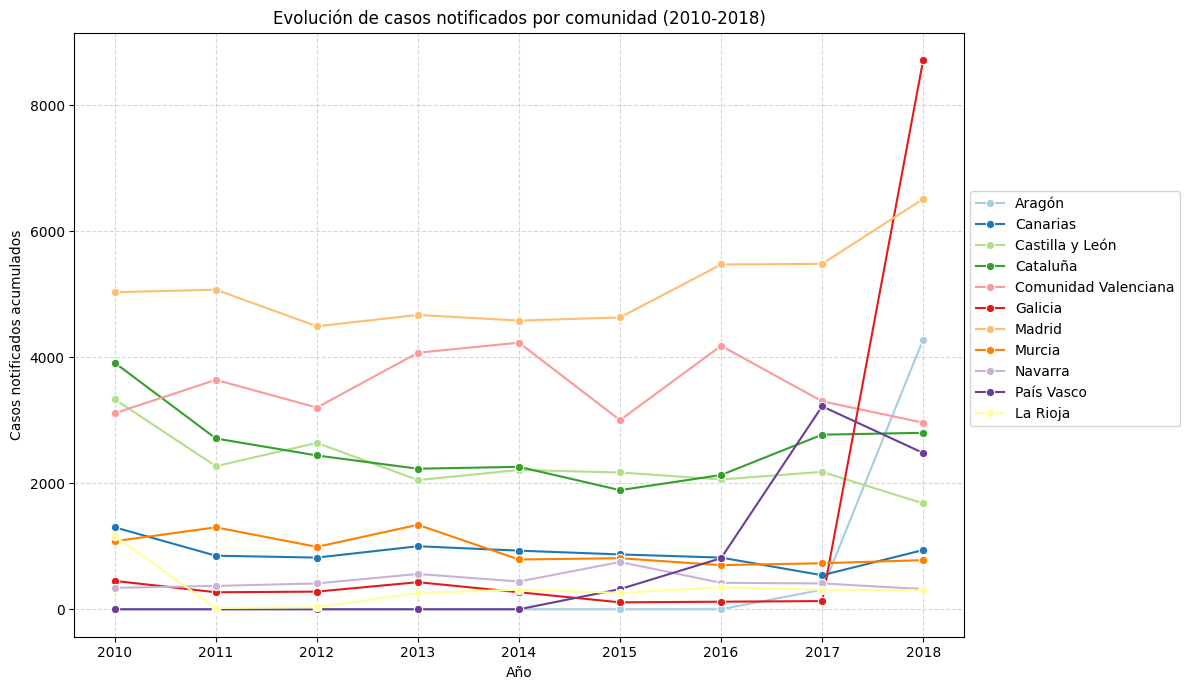

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
palette = sns.color_palette("Paired", n_colors=casos_largo["comunidad"].nunique())
sns.lineplot(data=casos_largo, x="año", y="casos", hue="comunidad",  palette=palette, marker="o")

plt.title("Evolución de casos notificados por comunidad (2010-2018)")
plt.xlabel("Año")
plt.ylabel("Casos notificados acumulados")
plt.legend(bbox_to_anchor=(1, 0.75), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

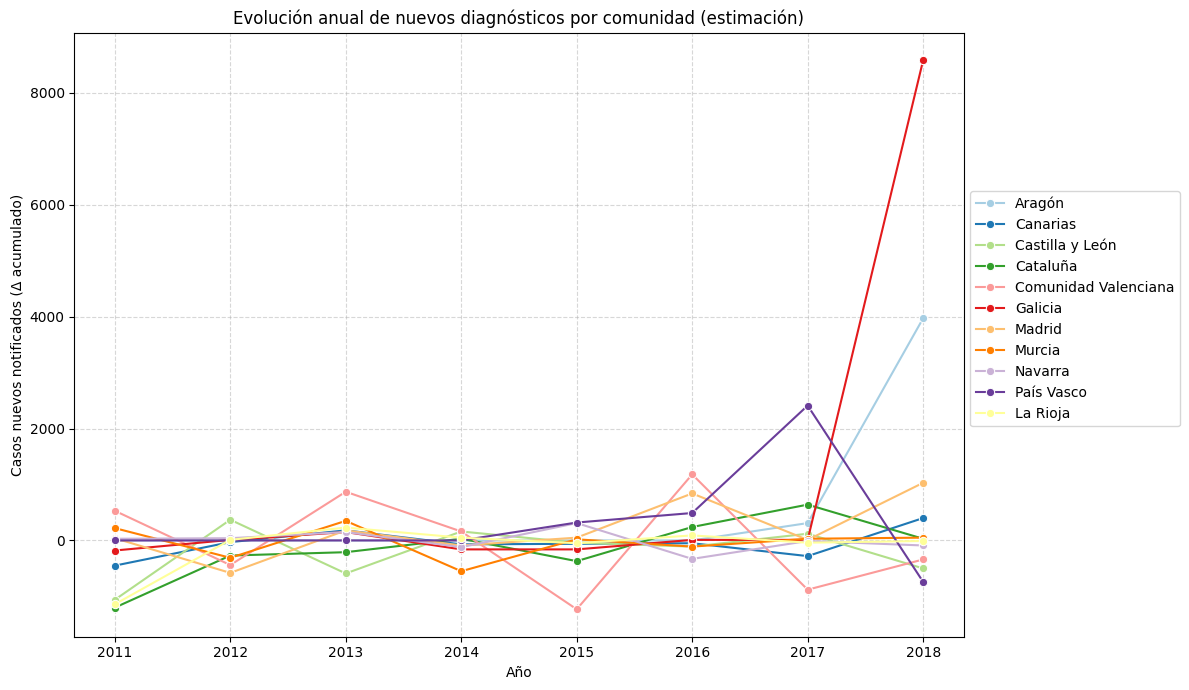

In [11]:
# Suponemos que df está en formato ancho y ya renombraste la columna a "comunidad"
años = [str(a) for a in range(2010, 2019)]
df_dif = casos_notificados_10_18[["comunidad"] + años].copy()
df_dif[años] = df_dif[años].diff(axis=1)  # Diferencias por año
df_dif_long = df_dif.melt(id_vars="comunidad", var_name="año", value_name="nuevos_casos")
df_dif_long["año"] = df_dif_long["año"].astype(int)

plt.figure(figsize=(12, 7))
sns.lineplot(data=df_dif_long, x="año", y="nuevos_casos", hue="comunidad", palette=palette, marker="o")

plt.title("Evolución anual de nuevos diagnósticos por comunidad (estimación)")
plt.xlabel("Año")
plt.ylabel("Casos nuevos notificados (Δ acumulado)")
plt.legend(bbox_to_anchor=(1, 0.75), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [12]:
df_dif_long

,comunidad,año,nuevos_casos
0,Aragón,2010,NaN
1,Canarias,2010,NaN
2,Castilla y León,2010,NaN
3,Cataluña,2010,NaN
4,Comunidad Valenciana,2010,NaN
...,...,...,...
94,Madrid,2018,1030.0
95,Murcia,2018,50.0
96,Navarra,2018,-90.0
97,País Vasco,2018,-740.0


###### Comparación con los datos de población del INE año 2018

In [13]:
poblacion_18 = pd.read_csv(r"C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\INE 2018\2915.csv", sep=";", encoding="latin1", header=None)
poblacion_18 = poblacion_18.rename(columns={0: "comunidad", 3: "poblacion_total"})
poblacion_18 = poblacion_18.drop(columns=[1, 2])
poblacion_18 = poblacion_18.loc[2:].reset_index(drop=True)

poblacion_18['poblacion_total'] = poblacion_18['poblacion_total'].astype(str).str.replace('.', '') 
poblacion_18['poblacion_total'] = poblacion_18['poblacion_total'].astype(float).astype(int)

poblacion_18['comunidad'] = poblacion_18['comunidad'].str.replace(r"^\d+\s+", "", regex=True)

nombre_map = {
    "Andalucía": None,
    "Aragón": "Aragón",
    "Asturias, Principado de": None,
    "Balears, Illes": None,
    "Canarias": "Canarias",
    "Cantabria": None,
    "Castilla y León": "Castilla y León",
    "Castilla - La Mancha": None,
    "Cataluña": "Cataluña",
    "Comunitat Valenciana": "Comunidad Valenciana",  # así se llama en ReeR
    "Extremadura": None,
    "Galicia": "Galicia",
    "Madrid, Comunidad de": "Madrid",  # con salto de línea
    "Murcia, Región de": "Murcia",
    "Navarra, Comunidad Foral de": "Navarra",
    "País Vasco": "País Vasco",
    "Rioja, La": "La Rioja",
    "Ceuta": None,
    "Melilla": None
}

poblacion_18["comunidad_final"] = poblacion_18["comunidad"].map(nombre_map)
poblacion_18_final = poblacion_18[poblacion_18["comunidad_final"].notna()][["comunidad_final", "poblacion_total"]].rename(columns={"comunidad_final": "comunidad"}).reset_index(drop=True)

poblacion_18_final

,comunidad,poblacion_total
0,Aragón,1308728
1,Canarias,2127685
2,Castilla y León,2409164
3,Cataluña,7600065
4,Comunidad Valenciana,4963703
5,Galicia,2701743
6,Madrid,6578079
7,Murcia,1478509
8,Navarra,647554
9,País Vasco,2199088


In [14]:
poblacion_18['comunidad']

0                       Andalucía
1                          Aragón
2         Asturias, Principado de
3                  Balears, Illes
4                        Canarias
5                       Cantabria
6                 Castilla y León
7            Castilla - La Mancha
8                        Cataluña
9            Comunitat Valenciana
10                    Extremadura
11                        Galicia
12           Madrid, Comunidad de
13              Murcia, Región de
14    Navarra, Comunidad Foral de
15                     País Vasco
16                      Rioja, La
17                          Ceuta
18                        Melilla
Name: comunidad, dtype: object

In [15]:
comparativa_poblacion_18 = poblacion_18_final.merge(casos_notificados_10_18, on="comunidad")
comparativa_poblacion_18.drop(columns=["< 2010", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], inplace=True)
comparativa_poblacion_18.rename(columns={"2018": "poblacion_er"}, inplace=True)
comparativa_poblacion_18

,comunidad,poblacion_total,poblacion_er
0,Aragón,1308728,4280
1,Canarias,2127685,940
2,Castilla y León,2409164,1680
3,Cataluña,7600065,2800
4,Comunidad Valenciana,4963703,2960
5,Galicia,2701743,8710
6,Madrid,6578079,6510
7,Murcia,1478509,780
8,Navarra,647554,320
9,País Vasco,2199088,2480


In [16]:
comparativa_poblacion_18["tasa_por_100mil"] = round(comparativa_poblacion_18["poblacion_er"] / comparativa_poblacion_18["poblacion_total"] * 100000, 2)
comparativa_poblacion_18

,comunidad,poblacion_total,poblacion_er,tasa_por_100mil
0,Aragón,1308728,4280,327.04
1,Canarias,2127685,940,44.18
2,Castilla y León,2409164,1680,69.73
3,Cataluña,7600065,2800,36.84
4,Comunidad Valenciana,4963703,2960,59.63
5,Galicia,2701743,8710,322.38
6,Madrid,6578079,6510,98.97
7,Murcia,1478509,780,52.76
8,Navarra,647554,320,49.42
9,País Vasco,2199088,2480,112.77


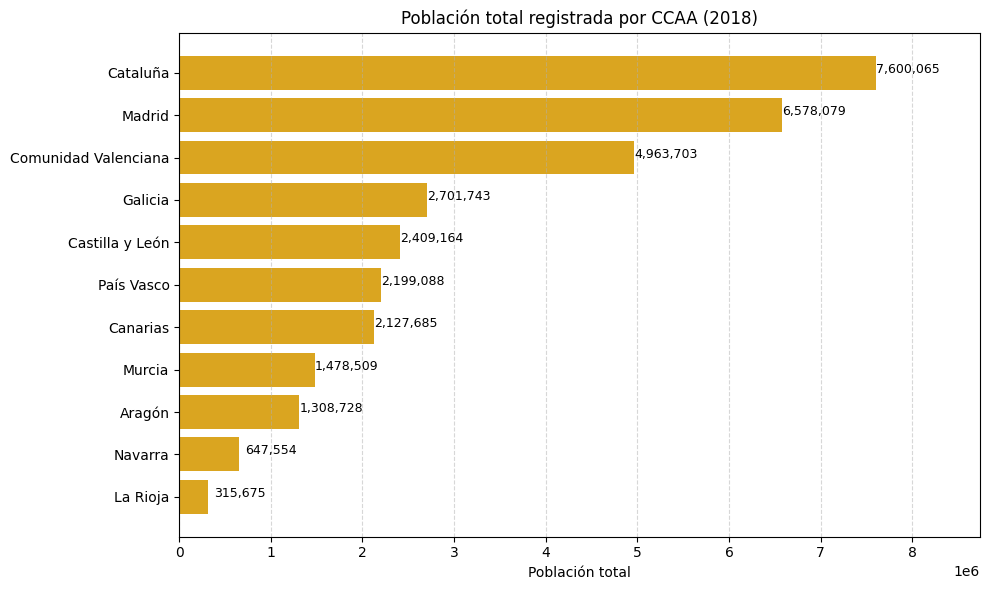

In [17]:
df_ordenado = comparativa_poblacion_18.sort_values("poblacion_total", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(df_ordenado["comunidad"], df_ordenado["poblacion_total"], color="goldenrod")
plt.xlabel("Población total")
plt.title("Población total registrada por CCAA (2018)")
plt.xlim(0, df_ordenado["poblacion_total"].max() * 1.15)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()

# Etiquetas de valores
for i, v in enumerate(df_ordenado["poblacion_total"]):
    plt.text(v + 350000, i, f"{v:,.0f}", ha='center', fontsize=9, color='black')

plt.show()

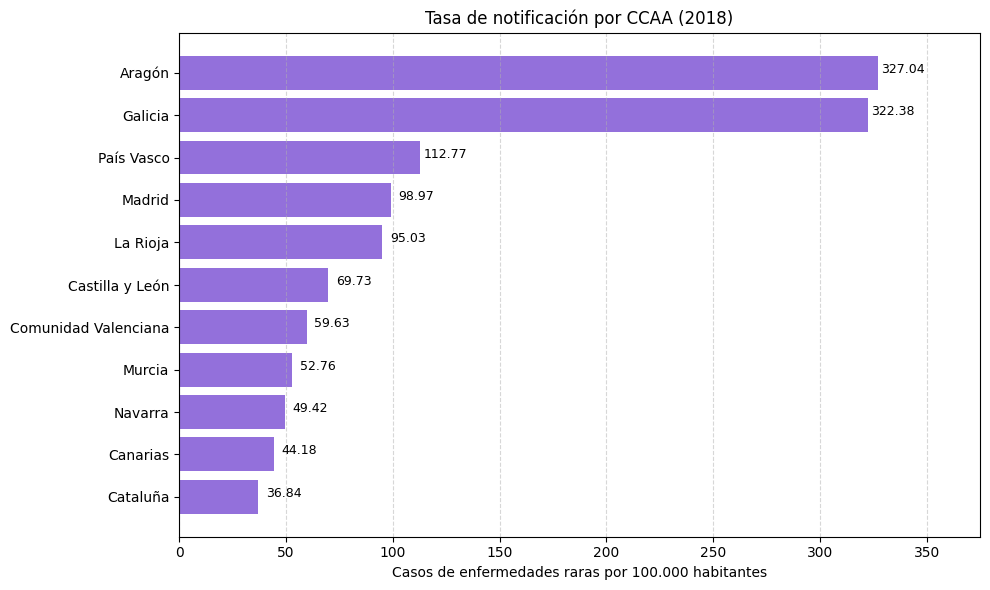

In [18]:
df_ordenado = comparativa_poblacion_18.sort_values("tasa_por_100mil", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(df_ordenado["comunidad"], df_ordenado["tasa_por_100mil"], color="mediumpurple")
plt.xlabel("Casos de enfermedades raras por 100.000 habitantes")
plt.title("Tasa de notificación por CCAA (2018)")
plt.xlim(0, 375)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()

# Etiquetas de valores
for i, v in enumerate(df_ordenado["tasa_por_100mil"]):
    plt.text(v + 12, i, f"{v:,.2f}", ha='center', fontsize=9, color='black')

plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np

pendientes = {}

for comunidad in casos_notificados_10_18["comunidad"]:
    y = casos_largo[casos_largo["comunidad"] == comunidad]["casos"].values
    x = np.arange(len(y)).reshape(-1, 1)
    modelo = LinearRegression().fit(x, y)
    pendientes[comunidad] = modelo.coef_[0]

# Convertir a DataFrame para visualizar
df_pendientes = pd.DataFrame.from_dict(pendientes, orient="index", columns=["pendiente"]).sort_values("pendiente", ascending=False)


In [20]:
# 1. Renombrar la columna "Registros" para asegurar consistencia
casos = casos_notificados_10_18.rename(columns={"Registros": "Región"})

# 2. Filtrar solo los años 2010 a 2018 (y Región)
columnas = ["Región"] + [str(año) for año in range(2010, 2019)]
casos_filtrado = casos[columnas]

# 3. Convertir a diccionario estilo Python
data = casos_filtrado.to_dict(orient="list")
data

KeyError: "['Región'] not in index"

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# === 1. Descargar el GeoJSON de comunidades autónomas de España ===
geojson_url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/spain-communities.geojson"
gdf = gpd.read_file(geojson_url)

# Mostrar nombres reales del GeoJSON para mapearlos
print("Nombres en el GeoJSON:")
print(gdf["name"].unique())

# === 2. Tus datos de casos por año ===
data = {
    "Región": [
        "Andalucía", "Aragón", "Canarias", "Castilla y León", "Cataluña", "Comunidad Valenciana",
        "Galicia", "Madrid, Comunidad de", "Murcia, Región de", "Navarra, Comunidad Foral de",
        "País Vasco", "Rioja, La"
    ],
    "2010": [4690, 0, 1300, 3330, 3910, 3110, 450, 5030, 1080, 340, 0, 1160],
    "2011": [4670, 0, 850, 2270, 2710, 3640, 270, 5070, 1300, 370, 0, 20],
    "2012": [4470, 0, 820, 2640, 2440, 3200, 280, 4490, 990, 410, 0, 30],
    "2013": [4370, 0, 1000, 2050, 2230, 4070, 430, 4670, 1340, 560, 0, 260],
    "2014": [4510, 0, 930, 2210, 2260, 4230, 270, 4580, 790, 440, 0, 310],
    "2015": [4040, 0, 870, 2170, 1890, 3000, 110, 4630, 810, 750, 320, 260],
    "2016": [3600, 0, 820, 2060, 2130, 4180, 120, 5470, 700, 420, 810, 350],
    "2017": [3310, 310, 540, 2180, 2770, 3300, 130, 5480, 730, 410, 3220, 310],
    "2018": [2890, 4280, 940, 1680, 2800, 2960, 8710, 6510, 780, 320, 2480, 300],
}
df = pd.DataFrame(data)

# === 3. Mapeo de nombres entre tu DataFrame y el GeoJSON ===
nombre_map = {
    "Andalucía": "Andalucía",
    "Aragón": "Aragón",
    "Canarias": "Canarias",
    "Castilla y León": "Castilla y León",
    "Cataluña": "Cataluña",
    "Comunidad Valenciana": "Comunidad Valenciana",
    "Galicia": "Galicia",
    "Madrid, Comunidad de": "Madrid",
    "Murcia, Región de": "Murcia",
    "Navarra, Comunidad Foral de": "Navarra",
    "País Vasco": "País Vasco",
    "Rioja, La": "La Rioja"
}

df["GeoName"] = df["Región"].map(nombre_map)

# === 4. Crear salida de imágenes ===
output_folder = "mapas_por_año"
os.makedirs(output_folder, exist_ok=True)

# === 5. Dibujar mapa para cada año ===
for año in [str(y) for y in range(2010, 2019)]:
    # Crear tabla de unión
    data_year = df[["GeoName", año]].rename(columns={año: "Valor"})
    
    # Unir con el GeoDataFrame
    merged = gdf.merge(data_year, left_on="name", right_on="GeoName", how="left")
    merged["Valor"] = merged["Valor"].fillna(0)

    # Crear mapa
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    merged.plot(column="Valor", cmap="Oranges", linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f"Casos Notificados por Comunidad Autónoma - {año}", fontsize=15)
    ax.axis("off")

    # Guardar imagen
    filename = f"{output_folder}/mapa_{año}.png"
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    plt.close()

print(f"Mapas guardados en la carpeta: {output_folder}")


Nombres en el GeoJSON:
['Castilla-Leon' 'Cataluña' 'Ceuta' 'Murcia' 'La Rioja' 'Baleares'
 'Canarias' 'Cantabria' 'Andalucia' 'Asturias' 'Valencia' 'Melilla'
 'Navarra' 'Galicia' 'Aragon' 'Madrid' 'Extremadura' 'Castilla-La Mancha'
 'Pais Vasco']
✅ Mapas guardados en la carpeta: mapas_por_año


##### Tabla 2. Número de casos vivos a 31 de diciembre de 2018 según sexo. Registro Estatal de Enfermedades Raras, 2010-2018
página 10, tabla 1

In [21]:
casos_vivos_10_18 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2021\tabla_p10_t1.csv')
casos_vivos_10_18.fillna(value=0, inplace=True)
casos_vivos_10_18 = casos_vivos_10_18.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'VIVOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
casos_vivos_10_18 = casos_vivos_10_18.loc[1:22].reset_index(drop=True)
casos_vivos_10_18 = casos_vivos_10_18.drop(columns=['total'])

columnas_numericas = casos_vivos_10_18.columns[1:]

for col in columnas_numericas:
    casos_vivos_10_18[col] = casos_vivos_10_18[col].astype(str).str.replace('.', '')    # elimino puntos
    casos_vivos_10_18[col] = casos_vivos_10_18[col].astype(float).astype(int)           # convierto a enteros

casos_vivos_10_18

,enfermedad_rara,hombre,mujer
0,Ataxia de Friedreich,243,291
1,Atrofia muscular espinal proximal,187,153
2,Complejo Esclerosis Tuberosa,694,746
3,Displasia Renal,828,497
4,Distrofia miotónica de Steinert,1346,1421
5,Enfermedad de Fabry,135,110
6,Enfermedad de Gaucher,93,70
7,Enfermedad de Huntington,672,842
8,Enfermedad de Niemann Pick,38,25
9,Enfermedad de Rendu Osler,474,650


##### Tabla 3. Número de casos fallecidos entre 1 enero de 2010 y 31 de diciembre de 2018 según sexo. Registro Estatal de Enfermedades Raras, 2010-2018
página 11, tabla 1

In [22]:
casos_fallecidos_10_18 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2021\tabla_p11_t1.csv')
casos_fallecidos_10_18.fillna(value=0, inplace=True)
casos_fallecidos_10_18 = casos_fallecidos_10_18.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'FALLECIDOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
casos_fallecidos_10_18 = casos_fallecidos_10_18.loc[1:22].reset_index(drop=True)
casos_fallecidos_10_18 = casos_fallecidos_10_18.drop(columns=['total'])

columnas_numericas = casos_fallecidos_10_18.columns[1:]

for col in columnas_numericas:
    casos_fallecidos_10_18[col] = casos_fallecidos_10_18[col].astype(str).str.replace('.', '')    # elimino puntos
    casos_fallecidos_10_18[col] = casos_fallecidos_10_18[col].astype(float).astype(int)           # convierto a enteros

casos_fallecidos_10_18

,enfermedad_rara,hombre,mujer
0,Ataxia de Friedreich,40,46
1,Atrofia muscular espinal proximal,43,40
2,Complejo Esclerosis Tuberosa,35,43
3,Displasia Renal,17,15
4,Distrofia miotónica de Steinert,376,263
5,Enfermedad de Fabry,12,10
6,Enfermedad de Gaucher,5,5
7,Enfermedad de Huntington,298,309
8,Enfermedad de Niemann Pick,4,7
9,Enfermedad de Rendu Osler,69,67


### **Informe 2022**

##### Tabla 1. Número de casos vivos a 1 de enero de 2020 según sexo.
página 11 tabla 1 y página 12 tabla 1

In [23]:
tabla1 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2022\tabla_p11_t1.csv')
# casos_vivos_20.fillna(value=0, inplace=True)
tabla1 = tabla1.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'VIVOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
tabla1 = tabla1.loc[1:]
tabla1 = tabla1.drop(columns=['total'])
tabla2 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2022\tabla_p12_t1.csv')
tabla2 = tabla2.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'VIVOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
tabla2 = tabla2.loc[1:5]
tabla2 = tabla2.drop(columns=['total'])

casos_vivos_20 = pd.concat([tabla1, tabla2], axis=0, ignore_index=True)

In [24]:
"""El sistema detecta el punto de los miles como una coma - CORREGIR"""
columnas_numericas = casos_vivos_20.columns[1:]

for col in columnas_numericas:
    casos_vivos_20[col] = casos_vivos_20[col].astype(str).str.replace('.', '')    # elimino puntos
    casos_vivos_20[col] = casos_vivos_20[col].astype(float).astype(int)           # convierto a enteros

casos_vivos_20

,enfermedad_rara,hombre,mujer
0,Ataxia de Friedreich,300,352
1,Atrofia Muscular Espinal Proximal,278,240
2,Complejo Esclerosis Tuberosa,906,1000
3,Displasia Renal,1049,644
4,Distrofia Miotónica de Steinert,1771,1863
5,Enfermedad de Fabry,190,202
6,Enfermedad de Gaucher,116,94
7,Enfermedad de Huntington,715,884
8,Enfermedad de Niemann Pick,46,28
9,Enfermedad de Rendu Osler,574,833


##### Tabla 2. Número de casos fallecidos entre 1 enero 2010 y 31 de diciembre de 2019 según sexo.
página 12 tabla 2 y página 13 tabla 1

In [25]:
tabla1 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2022\tabla_p12_t2.csv')
# casos_vivos_20.fillna(value=0, inplace=True)
tabla1 = tabla1.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'FALLECIDOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
tabla1 = tabla1.loc[1:]
tabla1 = tabla1.drop(columns=['total'])
tabla2 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2022\tabla_p13_t1.csv')
tabla2 = tabla2.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'FALLECIDOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
tabla2 = tabla2.loc[1:3]
tabla2 = tabla2.drop(columns=['total'])

casos_fallecidos_20 = pd.concat([tabla1, tabla2], axis=0, ignore_index=True)

columnas_numericas = casos_vivos_20.columns[1:]

for col in columnas_numericas:
    casos_fallecidos_20[col] = casos_fallecidos_20[col].astype(str).str.replace('.', '')    # elimino puntos
    casos_fallecidos_20[col] = casos_fallecidos_20[col].astype(float).astype(int)           # convierto a enteros

casos_fallecidos_20

,enfermedad_rara,hombre,mujer
0,Ataxia de Friedreich,74,70
1,Atrofia Muscular Espinal Proximal,68,59
2,Complejo Esclerosis Tuberosa,52,53
3,Displasia Renal,27,23
4,Distrofia Miotónica de Steinert,508,381
5,Enfermedad de Fabry,26,17
6,Enfermedad de Gaucher,7,7
7,Enfermedad de Huntington,383,416
8,Enfermedad de Niemann Pick,7,11
9,Enfermedad de Rendu Osler,130,124


##### Tabla 3. Número de casos vivos a 1 de enero de 2020 por enfermedad y grupo de edad.
Página 14 tabla 1 y Página 15 tabla 1

In [26]:
tabla1 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2022\tabla_p14_t1.csv')
nuevas_columnas = {
    'Grupos de edad': '< 1',
    'Unnamed: 2': '1 - 4',
    'Unnamed: 3': '5 - 9',
    'Unnamed: 4': '10 - 14',
    'Unnamed: 5': '15 - 19',
    'Unnamed: 6': '20 -24',
    'Unnamed: 7': '25 - 29',
    'Unnamed: 8': '30 - 34',
    'Unnamed: 9': '35 - 39',
    'Unnamed: 10': '40 - 44',
    'Unnamed: 11': '45 - 49',
    'Unnamed: 12': '50 - 54',
    'Unnamed: 13': '55 - 59',
    'Unnamed: 14': '60 - 64',
    'Unnamed: 15': '65 - 69',
    'Unnamed: 16': '70 - 74',
    'Unnamed: 17': '75 - 79',
    'Unnamed: 18': '80 - 84',
    'Unnamed: 19': '> 85',
    'latoT': 'total'
}
tabla1 = tabla1.rename(columns=nuevas_columnas)
tabla1 = tabla1.loc[1:]
tabla1 = tabla1.drop(columns=['total'])
tabla2 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2022\tabla_p15_t1.csv')
tabla2 = tabla2.rename(columns=nuevas_columnas)
tabla2 = tabla2.loc[1:5]
tabla2 = tabla2.drop(columns=['total'])
# tabla1
# tabla2
casos_vivos_20_edad = pd.concat([tabla1, tabla2], axis=0, ignore_index=True)

casos_vivos_20_edad

,Enfermedad,< 1,1 - 4,5 - 9,10 - 14,15 - 19,20 -24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,> 85
0,Ataxia de Friedreich,0,1,5,20,28,30,30,40,60,83,62,76,56,59,44,30,15,10,3
1,Atrofia Muscular Espinal Proximal,7,54,66,65,63,33,27,31,28,21,30,24,17,19,9,9,5,5,5
2,Complejo Esclerosis Tuberosa,1,57,136,153,151,131,128,163,207,225,166,135,85,65,48,27,16,10,2
3,Displasia Renal,23,326,461,373,192,90,50,41,34,29,18,12,9,11,3,7,6,5,3
4,Distrofia Miotónica de Steinert,3,17,49,82,103,146,164,205,338,509,494,500,370,280,186,104,51,22,11
5,Enfermedad de Fabry,0,2,9,13,20,11,18,26,28,32,52,43,51,31,18,21,9,4,4
6,Enfermedad de Gaucher,0,3,9,7,6,8,10,11,19,17,21,19,24,21,9,9,9,5,3
7,Enfermedad de Huntington,0,1,2,1,3,5,13,70,96,142,176,172,223,195,148,139,104,62,47
8,Enfermedad de Niemann Pick,0,7,10,4,1,8,4,5,3,9,3,1,5,4,2,3,2,1,2
9,Enfermedad de Rendu Osler,1,5,13,26,33,40,45,54,76,116,133,127,149,164,136,128,70,55,36


##### Tabla 4. Número de casos fallecidos entre 1 de enero de 2010 y 31 de diciembre de 2019 por enfermedad y grupo de edad de fallecimiento.
Página 15 tabla 2 y Página 16 tabla 1

In [27]:
tabla1 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2022\tabla_p15_t2.csv')
nuevas_columnas = {
    'Grupos de edad': '< 1',
    'Unnamed: 2': '1 - 4',
    'Unnamed: 3': '5 - 9',
    'Unnamed: 4': '10 - 14',
    'Unnamed: 5': '15 - 19',
    'Unnamed: 6': '20 -24',
    'Unnamed: 7': '25 - 29',
    'Unnamed: 8': '30 - 34',
    'Unnamed: 9': '35 - 39',
    'Unnamed: 10': '40 - 44',
    'Unnamed: 11': '45 - 49',
    'Unnamed: 12': '50 - 54',
    'Unnamed: 13': '55 - 59',
    'Unnamed: 14': '60 - 64',
    'Unnamed: 15': '65 - 69',
    'Unnamed: 16': '70 - 74',
    'Unnamed: 17': '75 - 79',
    'Unnamed: 18': '80 - 84',
    'Unnamed: 19': '> 85',
    'latoT': 'total'
}
tabla1 = tabla1.rename(columns=nuevas_columnas)
tabla1 = tabla1.loc[1:]
tabla1 = tabla1.drop(columns=['total'])
tabla2 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2022\tabla_p16_t1.csv')
tabla2 = tabla2.rename(columns=nuevas_columnas)
tabla2 = tabla2.loc[1:16]
tabla2 = tabla2.drop(columns=['total'])
# tabla1
tabla2
casos_fallecidos_10_20_edad = pd.concat([tabla1, tabla2], axis=0, ignore_index=True)

casos_fallecidos_10_20_edad

,Enfermedad,< 1,1 - 4,5 - 9,10 - 14,15 - 19,20 -24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,> 85
0,Ataxia de Friedreich,0,0,0,0,3,1,3,8,8,9,16,20,14,13,16,9,8,10,6
1,Atrofia Muscular Espinal Proximal,60,17,4,3,3,5,3,2,1,2,0,2,1,3,1,7,5,2,6
2,Complejo Esclerosis Tuberosa,0,1,1,0,1,1,6,10,5,11,11,9,10,6,6,13,3,6,5
3,Displasia Renal,11,5,7,1,1,1,1,0,1,0,2,2,3,2,2,5,2,2,2
4,Distrofia Miotónica de Steinert,1,2,1,4,5,1,4,11,14,50,70,109,164,147,142,92,33,26,13
5,Enfermedad de Fabry,0,0,0,0,0,0,0,1,0,2,0,5,4,4,6,6,4,8,3
6,Enfermedad de Gaucher,1,0,0,0,0,0,0,0,0,1,0,2,1,1,1,3,1,0,3
7,Enfermedad de Huntington,0,0,0,1,1,2,3,8,26,44,59,53,91,95,90,109,69,82,66
8,Enfermedad de Niemann Pick,0,8,4,0,0,0,0,0,0,1,0,1,0,0,2,0,1,0,1
9,Enfermedad de Rendu Osler,0,2,1,0,0,2,0,1,2,1,4,8,8,17,21,30,49,57,51


### **Informe 2023**

##### Tabla 1. Número de casos vivos a 1 de enero de 2021 según sexo y entidad clínica considerada.
página 11 tabla 1

In [28]:
casos_vivos_21 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2023\tabla_p11_t1.csv')
casos_vivos_21 = casos_vivos_21.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'VIVOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
casos_vivos_21 = casos_vivos_21.loc[1:24].reset_index(drop=True)
casos_vivos_21 = casos_vivos_21.drop(columns=['total'])

columnas_numericas = casos_vivos_21.columns[1:]

for col in columnas_numericas:
    casos_vivos_21[col] = casos_vivos_21[col].astype(str).str.replace('.', '')
    casos_vivos_21[col] = casos_vivos_21[col].astype(float).astype(int)

casos_vivos_21

,enfermedad_rara,hombre,mujer
0,Ataxia de Friedreich,290,333
1,Atrofia Muscular Espinal Proximal,301,252
2,Complejo Esclerosis Tuberosa,1002,1095
3,Displasia Renal,1173,764
4,Distrofia Miotónica de Steinert,1861,1958
5,Enfermedad de Fabry,230,243
6,Enfermedad de Gaucher,134,131
7,Enfermedad de Huntington,803,1007
8,Enfermedad de Niemann Pick,47,26
9,Enfermedad de Rendu Osler,639,889


##### Tabla 2. Número de casos fallecidos entre 1 enero 2010 y 31 de diciembre de 2020 según sexo y entidad clínica considerada.
Página 12 tabla 1

In [29]:
casos_fallecidos_10_21 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2023\tabla_p12_t1.csv')
casos_fallecidos_10_21 = casos_fallecidos_10_21.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'FALLECIDOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
casos_fallecidos_10_21 = casos_fallecidos_10_21.loc[1:24].reset_index(drop=True)
casos_fallecidos_10_21 = casos_fallecidos_10_21.drop(columns=['total'])

columnas_numericas = casos_fallecidos_10_21.columns[1:]

for col in columnas_numericas:
    casos_fallecidos_10_21[col] = casos_fallecidos_10_21[col].astype(str).str.replace('.', '')
    casos_fallecidos_10_21[col] = casos_fallecidos_10_21[col].astype(float).astype(int)

casos_fallecidos_10_21

,enfermedad_rara,hombre,mujer
0,Ataxia de Friedreich,96,97
1,Atrofia Muscular Espinal Proximal,79,65
2,Complejo Esclerosis Tuberosa,63,72
3,Displasia Renal,44,27
4,Distrofia Miotónica de Steinert,641,492
5,Enfermedad de Fabry,33,22
6,Enfermedad de Gaucher,15,16
7,Enfermedad de Huntington,486,522
8,Enfermedad de Niemann Pick,12,14
9,Enfermedad de Rendu Osler,171,174


##### Tabla 3. Número de casos vivos a 1 de enero de 2021 por enfermedad y grupo de edad.
Página 13 tabla 1

In [30]:
casos_vivos_21_edad = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2023\tabla_p13_t1.csv')
nuevas_columnas = {
    'Grupos de edad': '< 1',
    'Unnamed: 2': '1 - 4',
    'Unnamed: 3': '5 - 9',
    'Unnamed: 4': '10 - 14',
    'Unnamed: 5': '15 - 19',
    'Unnamed: 6': '20 -24',
    'Unnamed: 7': '25 - 29',
    'Unnamed: 8': '30 - 34',
    'Unnamed: 9': '35 - 39',
    'Unnamed: 10': '40 - 44',
    'Unnamed: 11': '45 - 49',
    'Unnamed: 12': '50 - 54',
    'Unnamed: 13': '55 - 59',
    'Unnamed: 14': '60 - 64',
    'Unnamed: 15': '65 - 69',
    'Unnamed: 16': '70 - 74',
    'Unnamed: 17': '75 - 79',
    'Unnamed: 18': '80 - 84',
    'Unnamed: 19': '> 85',
    'latoT': 'total'
}
casos_vivos_21_edad = casos_vivos_21_edad.rename(columns=nuevas_columnas)
casos_vivos_21_edad = casos_vivos_21_edad.loc[1:24].reset_index(drop=True)
casos_vivos_21_edad = casos_vivos_21_edad.drop(columns=['total'])

casos_vivos_21_edad

,Enfermedad,Grupos de Edad,1 - 4,5 - 9,10 - 14,15 - 19,20 -24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,> 85
0,Ataxia de\nFriedreich,0,0,3,15,25,34,35,35,50,68,64,78,57,61,39,24,18,10,7
1,Atrofia muscular\nespinal proximal,3,65,62,66,72,31,32,32,32,26,33,27,18,23,13,5,5,7,1
2,Complejo\nEsclerosis\nTuberosa,9,56,131,162,155,154,127,167,225,249,188,168,103,73,52,41,21,12,4
3,Displasia Renal,27,327,484,430,227,122,50,58,42,38,24,17,18,13,13,13,13,15,6
4,Distrofia\nmiotónica de\nSteinert,4,19,49,82,114,150,169,220,338,527,532,510,425,291,176,112,62,31,8
5,Enfermedad de\nFabry,0,2,9,18,25,13,17,33,30,42,60,52,61,38,22,24,14,8,5
6,Enfermedad de\nGaucher,0,4,12,10,10,12,12,13,16,23,24,22,34,29,13,13,11,5,2
7,Enfermedad de\nHuntington,0,0,2,0,3,2,22,63,120,143,220,197,250,221,168,162,122,72,43
8,Enfermedad de\nNiemann Pick,0,3,13,4,4,7,4,4,5,7,4,2,4,2,2,2,3,1,2
9,Enfermedad de\nRendu Osler,2,6,12,31,35,41,50,54,76,123,150,144,164,161,163,133,85,56,42


##### Tabla 4. Número de casos fallecidos entre 1 de enero de 2010 y 31 de diciembre de 2020 por enfermedad y grupo de edad de fallecimiento.
Página 14 tabla 1

In [31]:
casos_fallecidos_10_21_edad = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2023\tabla_p14_t1.csv')
nuevas_columnas = {
    'Grupos de edad': '< 1',
    'Unnamed: 2': '1 - 4',
    'Unnamed: 3': '5 - 9',
    'Unnamed: 4': '10 - 14',
    'Unnamed: 5': '15 - 19',
    'Unnamed: 6': '20 -24',
    'Unnamed: 7': '25 - 29',
    'Unnamed: 8': '30 - 34',
    'Unnamed: 9': '35 - 39',
    'Unnamed: 10': '40 - 44',
    'Unnamed: 11': '45 - 49',
    'Unnamed: 12': '50 - 54',
    'Unnamed: 13': '55 - 59',
    'Unnamed: 14': '60 - 64',
    'Unnamed: 15': '65 - 69',
    'Unnamed: 16': '70 - 74',
    'Unnamed: 17': '75 - 79',
    'Unnamed: 18': '80 - 84',
    'Unnamed: 19': '> 85',
    'latoT': 'total'
}
casos_fallecidos_10_21_edad = casos_fallecidos_10_21_edad.rename(columns=nuevas_columnas)
casos_fallecidos_10_21_edad = casos_fallecidos_10_21_edad.loc[1:24].reset_index(drop=True)
casos_fallecidos_10_21_edad = casos_fallecidos_10_21_edad.drop(columns=['total'])

casos_fallecidos_10_21_edad

,Enfermedad,Grupos de Edad,1 - 4,5 - 9,10 - 14,15 - 19,20 -24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,> 85
0,Ataxia de\nFriedreich,0,0,0,0,3,1,4,8,8,13,22,23,21,20,27,14,11,12,6
1,Atrofia muscular\nespinal proximal,65,21,4,4,5,4,3,2,2,3,0,2,2,4,1,8,6,2,6
2,Complejo\nEsclerosis\nTuberosa,0,1,1,0,1,1,6,15,9,13,13,11,13,9,9,14,6,8,5
3,Displasia Renal,13,6,8,2,1,1,2,1,2,0,2,3,5,3,5,6,4,3,4
4,Distrofia\nmiotónica de\nSteinert,1,3,1,6,6,2,5,12,18,62,99,138,201,198,181,110,42,28,20
5,Enfermedad de\nFabry,0,0,0,0,0,0,0,1,0,2,0,7,5,4,6,9,7,10,4
6,Enfermedad de\nGaucher,2,1,0,0,0,0,0,0,0,2,1,3,1,2,2,4,2,2,9
7,Enfermedad de\nHuntington,0,0,0,1,1,4,3,13,31,51,75,69,114,116,113,134,91,99,93
8,Enfermedad de\nNiemann Pick,0,9,5,0,0,1,0,0,2,1,0,1,1,1,3,0,1,0,1
9,Enfermedad de\nRendu Osler,0,1,1,0,0,2,0,1,2,1,4,10,12,23,27,50,64,74,73


### **Informe 2024**

##### Tabla 1. Número de casos vivos a 1 de enero de 2022 según sexo y entidad clínica considerada.
página 12 tabla 1 y pagina 13 tabla 1

In [32]:
tabla1 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2024\tabla_p12_t1.csv')
tabla1 = tabla1.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'VIVOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
tabla1 = tabla1.loc[1:]
tabla1 = tabla1.drop(columns=['total'])
tabla2 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2024\tabla_p13_t1.csv')
tabla2 = tabla2.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'VIVOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
tabla2 = tabla2.loc[1:6]
tabla2 = tabla2.drop(columns=['total'])

casos_vivos_22 = pd.concat([tabla1, tabla2], axis=0, ignore_index=True)

columnas_numericas = casos_vivos_22.columns[1:]

for col in columnas_numericas:
    casos_vivos_22[col] = casos_vivos_22[col].astype(str).str.replace('.', '')    # elimino puntos
    casos_vivos_22[col] = casos_vivos_22[col].astype(float).astype(int)           # convierto a enteros

casos_vivos_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   enfermedad_rara  29 non-null     object
 1   hombre           29 non-null     int64 
 2   mujer            29 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 828.0+ bytes


###### hombre vs mujer

In [33]:
# Agregar columnas de análisis al df existente
casos_vivos_22["total"] = casos_vivos_22["hombre"] + casos_vivos_22["mujer"]
casos_vivos_22["diferencia"] = casos_vivos_22["mujer"] - casos_vivos_22["hombre"]
casos_vivos_22["% mujeres"] = round(((casos_vivos_22["mujer"] / casos_vivos_22["total"]) * 100), 2)
casos_vivos_22["% hombres"] = round(((casos_vivos_22["hombre"] / casos_vivos_22["total"]) * 100), 2)
casos_vivos_22

,enfermedad_rara,hombre,mujer,total,diferencia,% mujeres,% hombres
0,Artrogriposis múltiple congénita,189,194,383,5,50.65,49.35
1,Artrogriposis múltiple congénita distal,48,24,72,-24,33.33,66.67
2,Ataxia de Friedreich,305,365,670,60,54.48,45.52
3,Atrofia muscular espinal proximal,337,294,631,-43,46.59,53.41
4,Cirrosis biliar primaria,376,3576,3952,3200,90.49,9.51
5,Complejo esclerosis tuberosa,1091,1186,2277,95,52.09,47.91
6,Displasia renal,1356,903,2259,-453,39.97,60.03
7,Distrofia miotónica de Steinert,1968,2129,4097,161,51.96,48.04
8,Enfermedad de Fabry,281,306,587,25,52.13,47.87
9,Enfermedad de Gaucher,151,142,293,-9,48.46,51.54


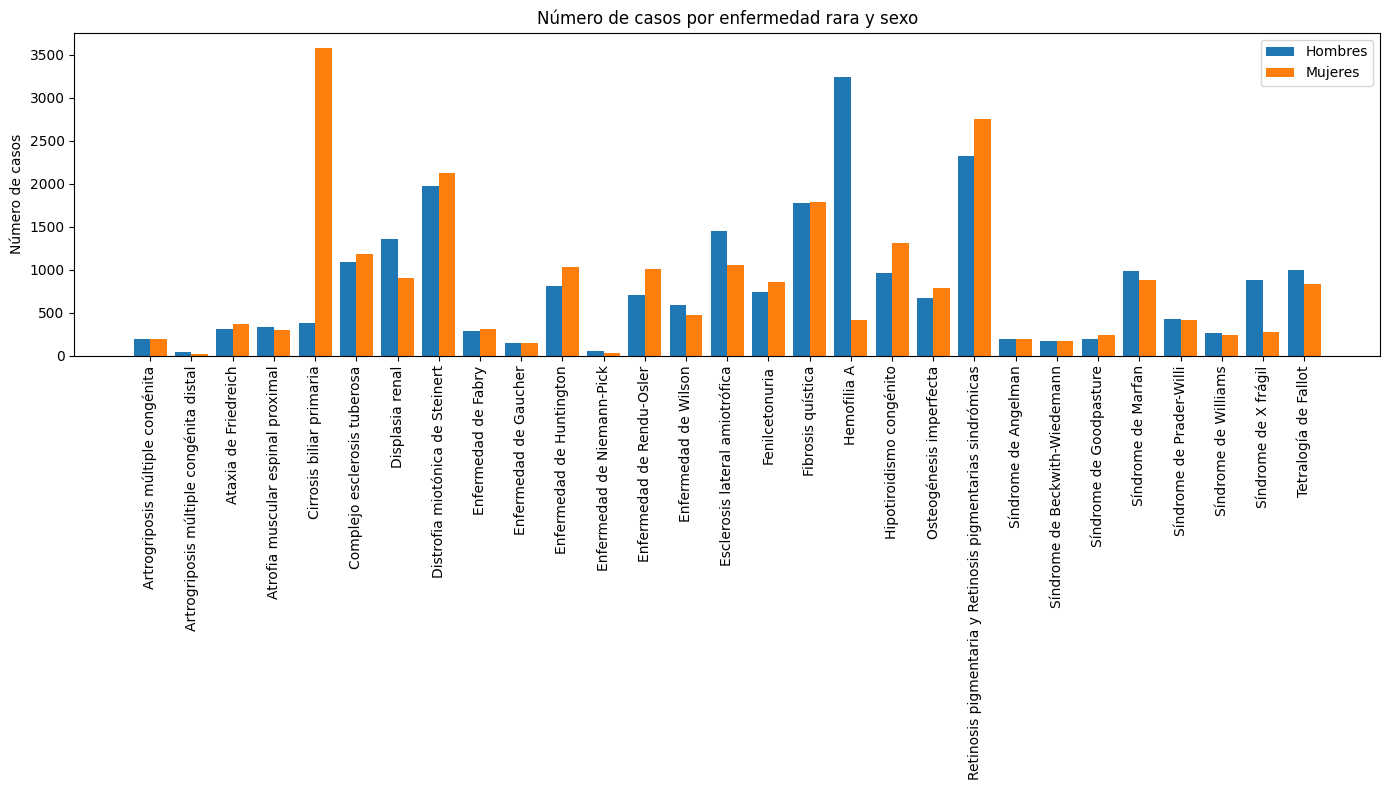

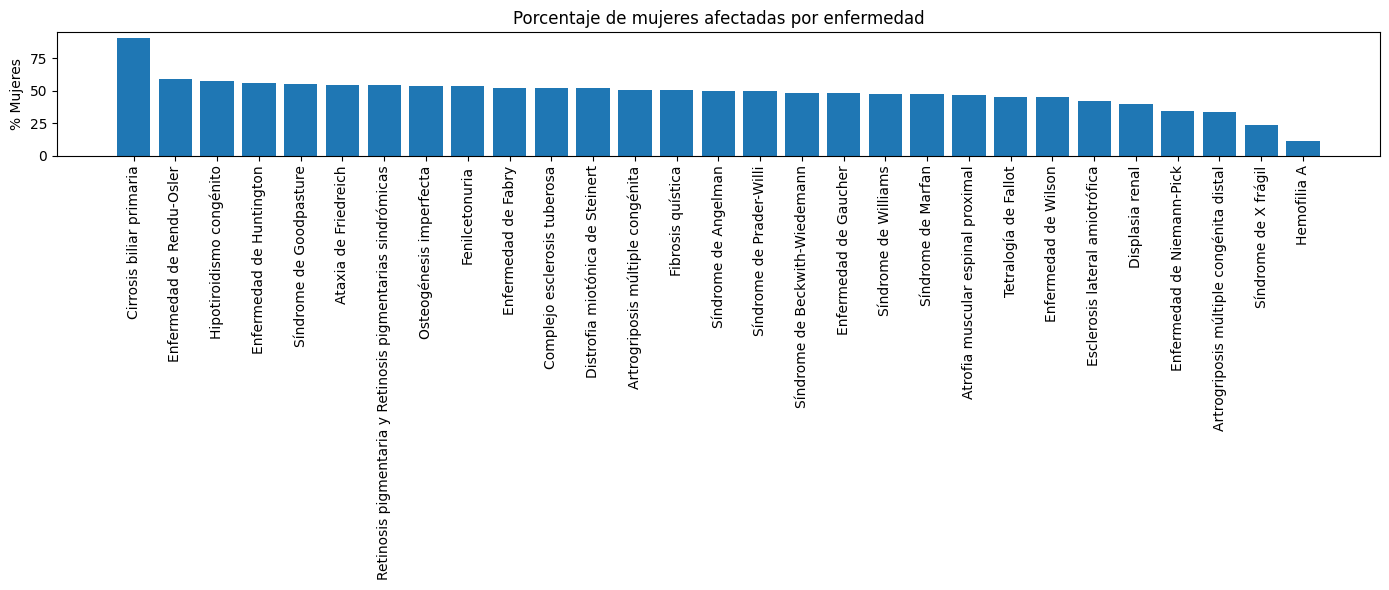

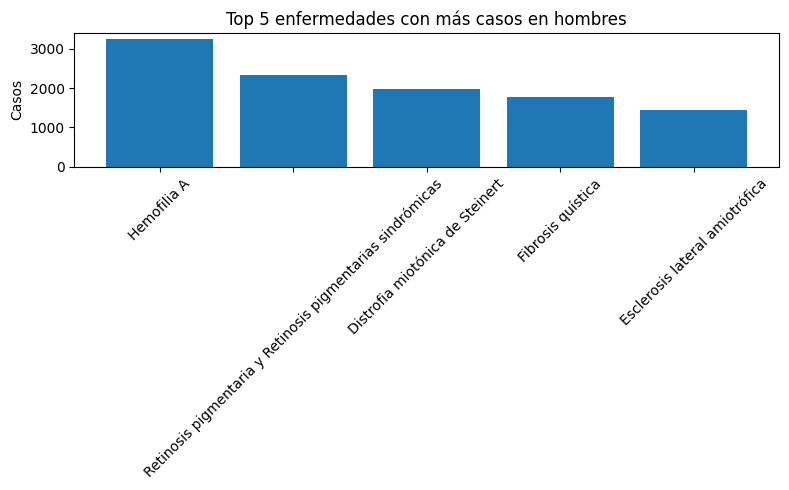

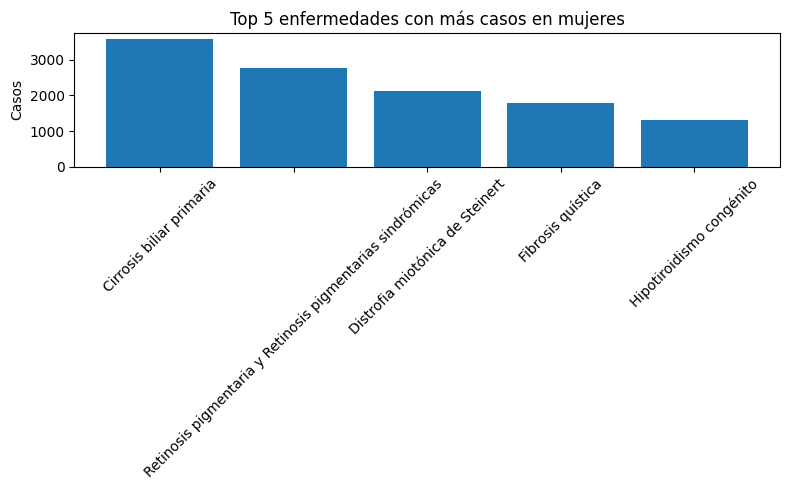

In [39]:
# Gráfico 1: Comparación hombre vs mujer para cada enfermedad (barras agrupadas)
plt.figure(figsize=(14, 8))
x = range(len(casos_vivos_22))
plt.bar(x, casos_vivos_22["hombre"], width=0.4, label="Hombres", align='center')
plt.bar([i + 0.4 for i in x], casos_vivos_22["mujer"], width=0.4, label="Mujeres", align='center')
plt.xticks([i + 0.2 for i in x], casos_vivos_22["enfermedad_rara"], rotation=90)
plt.ylabel("Número de casos")
plt.title("Número de casos por enfermedad rara y sexo")
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico 2: Porcentaje de mujeres por enfermedad (ordenado)
df_sorted = casos_vivos_22.sort_values("% mujeres", ascending=False)
plt.figure(figsize=(14, 6))
plt.bar(df_sorted["enfermedad_rara"], df_sorted["% mujeres"])
plt.xticks(rotation=90)
plt.ylabel("% Mujeres")
plt.title("Porcentaje de mujeres afectadas por enfermedad")
plt.tight_layout()
plt.show()

# Gráfico 3: Top 5 enfermedades más comunes por sexo
top_hombres = casos_vivos_22.sort_values("hombre", ascending=False).head(5)
top_mujeres = casos_vivos_22.sort_values("mujer", ascending=False).head(5)

# Hombres
plt.figure(figsize=(8, 5))
plt.bar(top_hombres["enfermedad_rara"], top_hombres["hombre"])
plt.title("Top 5 enfermedades con más casos en hombres")
plt.ylabel("Casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mujeres
plt.figure(figsize=(8, 5))
plt.bar(top_mujeres["enfermedad_rara"], top_mujeres["mujer"])
plt.title("Top 5 enfermedades con más casos en mujeres")
plt.ylabel("Casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Tabla 2. Número de casos fallecidos entre 1 enero 2010 y 31 de diciembre de 2021 según sexo y entidad clínica considerada.
página 13 tabla 2 y página 14 tabla 1

In [ ]:
tabla1 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2024\tabla_p13_t2.csv')

tabla1 = tabla1.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'FALLECIDOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
tabla1 = tabla1.loc[1:]
tabla1 = tabla1.drop(columns=['total'])
tabla2 = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2024\tabla_p14_t1.csv')
tabla2 = tabla2.rename(columns={'Enfermedad Rara': 'enfermedad_rara', 'FALLECIDOS': 'hombre', 'Unnamed: 2': 'mujer', 'Unnamed: 3': 'total'})
tabla2 = tabla2.loc[1:10]
tabla2 = tabla2.drop(columns=['total'])

casos_fallecidos_22 = pd.concat([tabla1, tabla2], axis=0, ignore_index=True)

columnas_numericas = casos_fallecidos_22.columns[1:]

for col in columnas_numericas:
    casos_fallecidos_22[col] = casos_fallecidos_22[col].astype(str).str.replace('.', '')    # elimino puntos
    casos_fallecidos_22[col] = casos_fallecidos_22[col].astype(float).astype(int)           # convierto a enteros

casos_fallecidos_22

,enfermedad_rara,hombre,mujer
0,Artrogriposis múltiple congénita,17,14
1,Artrogriposis múltiple congénita distal,0,0
2,Ataxia de Friedreich,127,118
3,Atrofia muscular espinal proximal,103,83
4,Cirrosis biliar primaria,226,1098
5,Complejo esclerosis tuberosa,81,87
6,Displasia renal,82,39
7,Distrofia miotónica de Steinert,790,606
8,Enfermedad de Fabry,42,31
9,Enfermedad de Gaucher,21,21


##### Tabla 3. Número de casos vivos a 1 de enero de 2022 por enfermedad y grupo de edad.
Página 15 tabla 1

In [ ]:
casos_vivos_22_edad = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2024\tabla_p15_t1.csv')
casos_vivos_22_edad.fillna(value= 0, inplace=True)
nuevas_columnas = {
    'Grupos de edad': '< 1',
    'Unnamed: 2': '1 - 4',
    'Unnamed: 3': '5 - 9',
    'Unnamed: 4': '10 - 14',
    'Unnamed: 5': '15 - 19',
    'Unnamed: 6': '20 -24',
    'Unnamed: 7': '25 - 29',
    'Unnamed: 8': '30 - 34',
    'Unnamed: 9': '35 - 39',
    'Unnamed: 10': '40 - 44',
    'Unnamed: 11': '45 - 49',
    'Unnamed: 12': '50 - 54',
    'Unnamed: 13': '55 - 59',
    'Unnamed: 14': '60 - 64',
    'Unnamed: 15': '65 - 69',
    'Unnamed: 16': '70 - 74',
    'Unnamed: 17': '75 - 79',
    'Unnamed: 18': '80 - 84',
    'Unnamed: 19': '> 85',
    'latoT': 'total'
}
casos_vivos_22_edad = casos_vivos_22_edad.rename(columns=nuevas_columnas)
casos_vivos_22_edad = casos_vivos_22_edad.loc[1:29].reset_index(drop=True)
casos_vivos_22_edad = casos_vivos_22_edad.drop(columns=['total'])

casos_vivos_22_edad

,Enfermedad Rara,Grupo de edad,1 - 4,5 - 9,10 - 14,15 - 19,20 -24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,> 85
0,Artrogriposis múltiple congénita,6,26,47,60,43,42,24,29,28,24,16,8,14,8,6,2,0,0,0
1,Artrogriposis múltiple congénita distal,1,9,16,6,8,5,3,2,3,4,4,2,3,1,2,0,1,1,1
2,Ataxia de Friedreich,0,0,3,26,28,38,37,33,53,68,72,75,64,66,49,25,20,8,5
3,Atrofia muscular espinal proximal,13,67,69,63,90,44,36,31,37,31,37,30,21,27,13,10,6,4,2
4,Cirrosis biliar primaria,0,0,0,0,1,0,3,18,49,140,217,357,517,550,490,479,443,321,367
5,Complejo esclerosis tuberosa,7,63,136,181,163,163,135,169,225,253,221,183,118,85,64,48,33,21,9
6,Displasia renal,48,304,498,500,274,146,79,74,55,51,31,32,27,33,24,26,22,24,11
7,Distrofia miotónica de Steinert,4,23,42,88,131,152,191,207,363,524,598,519,482,332,199,129,64,33,16
8,Enfermedad de Fabry,2,5,15,20,24,23,25,32,39,51,67,66,69,57,30,27,18,11,6
9,Enfermedad de Gaucher,1,2,12,12,10,13,13,15,17,24,30,20,38,29,24,12,12,5,4


##### Tabla 4. Número de casos fallecidos entre 1 de enero de 2010 y 31 de diciembre de 2021 por enfermedad y grupo de edad de fallecimiento.
Página 16 tabla 1

In [ ]:
casos_fallecidos_10_22_edad = pd.read_csv(r'C:\Users\maria\ITAcademy\Sprint 10 - Pràctica final\Data\tablas_extraidas_informes_ReeR\2024\tabla_p16_t1.csv')
nuevas_columnas = {
    'Grupos de edad': '< 1',
    'Unnamed: 2': '1 - 4',
    'Unnamed: 3': '5 - 9',
    'Unnamed: 4': '10 - 14',
    'Unnamed: 5': '15 - 19',
    'Unnamed: 6': '20 -24',
    'Unnamed: 7': '25 - 29',
    'Unnamed: 8': '30 - 34',
    'Unnamed: 9': '35 - 39',
    'Unnamed: 10': '40 - 44',
    'Unnamed: 11': '45 - 49',
    'Unnamed: 12': '50 - 54',
    'Unnamed: 13': '55 - 59',
    'Unnamed: 14': '60 - 64',
    'Unnamed: 15': '65 - 69',
    'Unnamed: 16': '70 - 74',
    'Unnamed: 17': '75 - 79',
    'Unnamed: 18': '80 - 84',
    'Unnamed: 19': '> 85',
    'latoT': 'total'
}
casos_fallecidos_10_22_edad = casos_fallecidos_10_22_edad.rename(columns=nuevas_columnas)
casos_fallecidos_10_22_edad = casos_fallecidos_10_22_edad.loc[1:29].reset_index(drop=True)
casos_fallecidos_10_22_edad = casos_fallecidos_10_22_edad.drop(columns=['total'])

casos_fallecidos_10_22_edad

,Enfermedad Rara,Grupo de edad,1 - 4,5 - 9,10 - 14,15 - 19,20 -24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,> 85
0,Artrogriposis múltiple congénita,10,5,2,0,1,0,0,1,1,1,2,0,1,1,1,1,2,0,2
1,Artrogriposis múltiple congénita distal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ataxia de Friedreich,0,0,1,0,4,1,5,10,15,19,28,29,25,29,29,17,12,14,7
3,Atrofia muscular espinal proximal,76,31,7,5,5,5,6,3,3,4,0,4,5,5,1,9,7,3,7
4,Cirrosis biliar primaria,0,0,0,0,0,0,0,0,1,4,7,24,47,66,99,145,190,284,457
5,Complejo esclerosis tuberosa,0,1,1,1,1,2,7,15,10,16,15,15,15,11,12,17,12,9,8
6,Displasia renal,17,8,9,2,1,2,2,3,3,0,2,7,10,6,6,13,10,9,11
7,Distrofia miotónica de Steinert,2,4,1,6,7,3,6,15,23,72,120,185,243,248,217,135,53,34,22
8,Enfermedad de Fabry,0,0,0,0,0,0,0,1,0,2,1,9,8,7,7,13,8,11,6
9,Enfermedad de Gaucher,2,2,0,0,0,0,0,0,0,2,1,4,1,4,2,7,5,2,10
